## Project (Supervised Machine Learning)

# HR Analytics - Job changing prediction

In [133]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [134]:
# call csv file and convert it to dataframe using Pandas function

In [135]:
df=pd.read_csv("aug_train.csv")              

In [246]:
# .head() will give the first 5 rows of the dataset by default

df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5.0,0.920,1.0,0.0,2.0,0.0,5.0,21.0,4.0,5.0,0.0,36,1.0
1,77.0,0.776,1.0,1.0,2.0,0.0,5.0,6.0,4.0,5.0,4.0,47,0.0
2,64.0,0.624,1.0,1.0,0.0,0.0,5.0,15.0,4.0,5.0,5.0,83,0.0
4,50.0,0.767,1.0,0.0,2.0,2.0,5.0,21.0,4.0,1.0,3.0,8,0.0
5,57.0,0.764,1.0,0.0,1.0,0.0,5.0,2.0,4.0,5.0,0.0,24,1.0


In [137]:
# dtypes will tell the data types of each column

df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [138]:
# .info() will give basic info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [139]:
# .shape will give number of rows and columns respectively

df.shape

(19158, 14)

## Data cleaning & EDA process

In [140]:
# Using other pandas Functions like .isnull().sum(), .value_counts()
# Find out messy or Null values.

In [141]:
# isnull().sum() gives the count of null values present in each column

df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [142]:
# value_counts() returns object containing counts of unique values 

df['enrollee_id'].value_counts()

8949     1
10660    1
30726    1
18507    1
31273    1
        ..
11547    1
32067    1
14356    1
18051    1
23834    1
Name: enrollee_id, Length: 19158, dtype: int64

In [143]:
# column 'enrollee_id' contains all unique values so, drop that column

del df["enrollee_id"]

In [144]:
df['city'].value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

In [145]:
df['city_development_index'].value_counts()

0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64

In [146]:
# column 'gender' contains 23% null values and it is categorical data so, fill it by mode

df['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [147]:
df.gender.replace(np.nan,'Male',inplace=True)

In [148]:
df['gender'].value_counts()

Male      17729
Female     1238
Other       191
Name: gender, dtype: int64

In [149]:
df['relevent_experience'].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [150]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [151]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [152]:
# column 'major_discipline' contains 18% null values and it is categorical data so, fill it by mode

df['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [153]:
df.major_discipline.replace(np.nan,'STEM',inplace=True)

In [154]:
df['major_discipline'].value_counts()

STEM               17305
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [155]:
df['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [156]:
# column 'company_size' contains 29% null values and it is categorical data so, fill it by mode

df['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [157]:
df.company_size.replace(np.nan,'50-99',inplace=True)

In [158]:
df['company_size'].value_counts()

50-99        9021
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [159]:
# column 'company_type' contains 29% null values and it is categorical data so, fill it by mode

df['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [160]:
df.company_type.replace(np.nan,'Pvt Ltd',inplace=True)

In [161]:
df['company_type'].value_counts()

Pvt Ltd                15957
Funded Startup          1001
Public Sector            955
Early Stage Startup      603
NGO                      521
Other                    121
Name: company_type, dtype: int64

In [162]:
df['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [163]:
df['training_hours'].value_counts()

28     329
12     292
18     291
22     282
50     279
      ... 
266      6
234      5
272      5
286      5
238      4
Name: training_hours, Length: 241, dtype: int64

In [164]:
df['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [165]:
df.isnull().sum()

city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university       386
education_level           460
major_discipline            0
experience                 65
company_size                0
company_type                0
last_new_job              423
training_hours              0
target                      0
dtype: int64

In [166]:
# remaining columns contain less than 3% null values so, drop that using dropna function  

df.dropna(inplace=True)

In [167]:
df.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [168]:
df.shape

(18014, 13)

<AxesSubplot:>

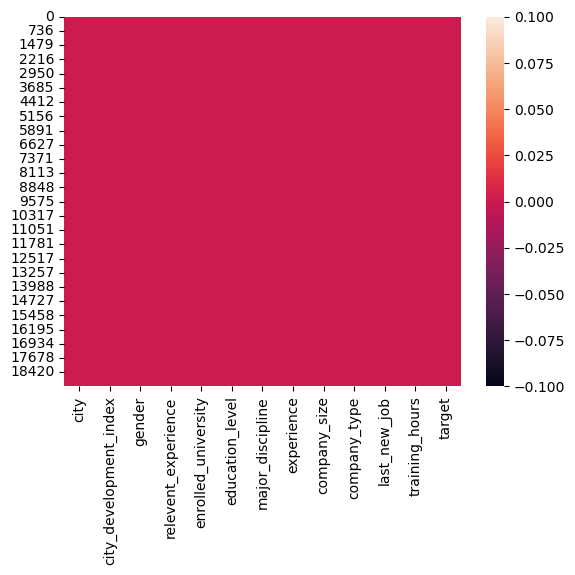

In [169]:
# plot heatmap to find null values present in the dataframe

sns.heatmap(df.isnull())

In [ ]:
# split data into numerical column and categorical column

In [170]:
numcol=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numcol.append(i)
numcol 

['city_development_index', 'training_hours', 'target']

In [171]:
len(numcol)

3

In [172]:
catcol=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catcol.append(i)
catcol 

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [173]:
# Using OrdinalEncoder convert our categorical columns into numerical column

In [174]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[catcol]=oe.fit_transform(df[catcol])

In [175]:
numcol=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numcol.append(i)
numcol

['city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target']

In [176]:
len(numcol)

13

In [177]:
# Plot Boxplot for numerical columns to find outliers present

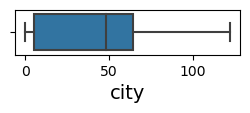

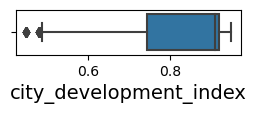

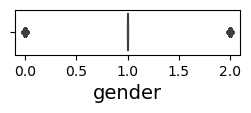

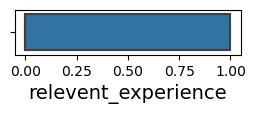

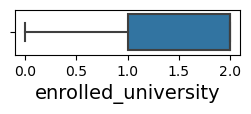

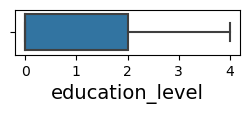

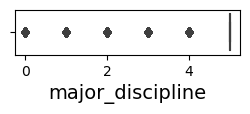

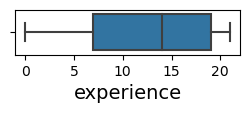

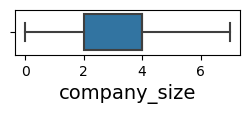

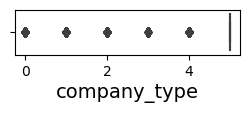

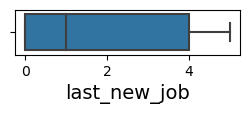

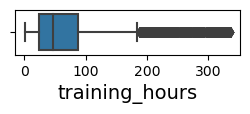

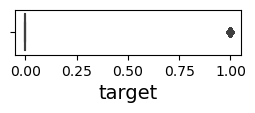

In [178]:
plt.figure()
plotn=1
for i in numcol:
    if plotn<=13:
        ax=plt.subplot(7,2,plotn)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=14)
        plotn=plotn+1
        plt.show()

In [179]:
# 'city_development_index','gender','major_discipline','company_type','training_hours' columns contain outliers so,
# Remove it using Z score method

features=df[[
 'city_development_index',
 'gender',
 'major_discipline',
 'company_type',
 'training_hours']]

In [180]:
from scipy.stats import zscore
z=abs(zscore(features))

In [181]:
z

,city_development_index,gender,major_discipline,company_type,training_hours
0,0.722878,0.211859,0.302358,0.397819,0.488663
1,0.456367,0.211859,0.302358,0.397819,0.305505
2,1.701127,0.211859,0.302358,0.397819,0.293920
4,0.530070,0.211859,0.302358,2.667981,0.954882
5,0.554638,0.211859,0.302358,0.397819,0.688471
...,...,...,...,...,...
19153,0.378931,0.211859,2.795276,0.397819,0.388759
19154,0.722878,0.211859,0.302358,0.397819,0.222252
19155,0.722878,0.211859,0.302358,0.397819,0.355457
19156,0.243448,0.211859,0.302358,0.397819,0.527030


In [182]:
len(numcol)

13

In [183]:
df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5.0,0.920,1.0,0.0,2.0,0.0,5.0,21.0,4.0,5.0,0.0,36,1.0
1,77.0,0.776,1.0,1.0,2.0,0.0,5.0,6.0,4.0,5.0,4.0,47,0.0
2,64.0,0.624,1.0,1.0,0.0,0.0,5.0,15.0,4.0,5.0,5.0,83,0.0
4,50.0,0.767,1.0,0.0,2.0,2.0,5.0,21.0,4.0,1.0,3.0,8,0.0
5,57.0,0.764,1.0,0.0,1.0,0.0,5.0,2.0,4.0,5.0,0.0,24,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,55.0,0.878,1.0,1.0,2.0,0.0,2.0,5.0,4.0,5.0,0.0,42,1.0
19154,5.0,0.920,1.0,0.0,2.0,0.0,5.0,5.0,4.0,5.0,3.0,52,1.0
19155,5.0,0.920,1.0,0.0,2.0,0.0,5.0,21.0,4.0,5.0,3.0,44,0.0
19156,94.0,0.802,1.0,0.0,2.0,1.0,5.0,20.0,5.0,5.0,1.0,97,0.0


In [184]:
newdf=df[(z<3).all(axis=1)]
newdf

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5.0,0.920,1.0,0.0,2.0,0.0,5.0,21.0,4.0,5.0,0.0,36,1.0
1,77.0,0.776,1.0,1.0,2.0,0.0,5.0,6.0,4.0,5.0,4.0,47,0.0
2,64.0,0.624,1.0,1.0,0.0,0.0,5.0,15.0,4.0,5.0,5.0,83,0.0
4,50.0,0.767,1.0,0.0,2.0,2.0,5.0,21.0,4.0,1.0,3.0,8,0.0
5,57.0,0.764,1.0,0.0,1.0,0.0,5.0,2.0,4.0,5.0,0.0,24,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,55.0,0.878,1.0,1.0,2.0,0.0,2.0,5.0,4.0,5.0,0.0,42,1.0
19154,5.0,0.920,1.0,0.0,2.0,0.0,5.0,5.0,4.0,5.0,3.0,52,1.0
19155,5.0,0.920,1.0,0.0,2.0,0.0,5.0,21.0,4.0,5.0,3.0,44,0.0
19156,94.0,0.802,1.0,0.0,2.0,1.0,5.0,20.0,5.0,5.0,1.0,97,0.0


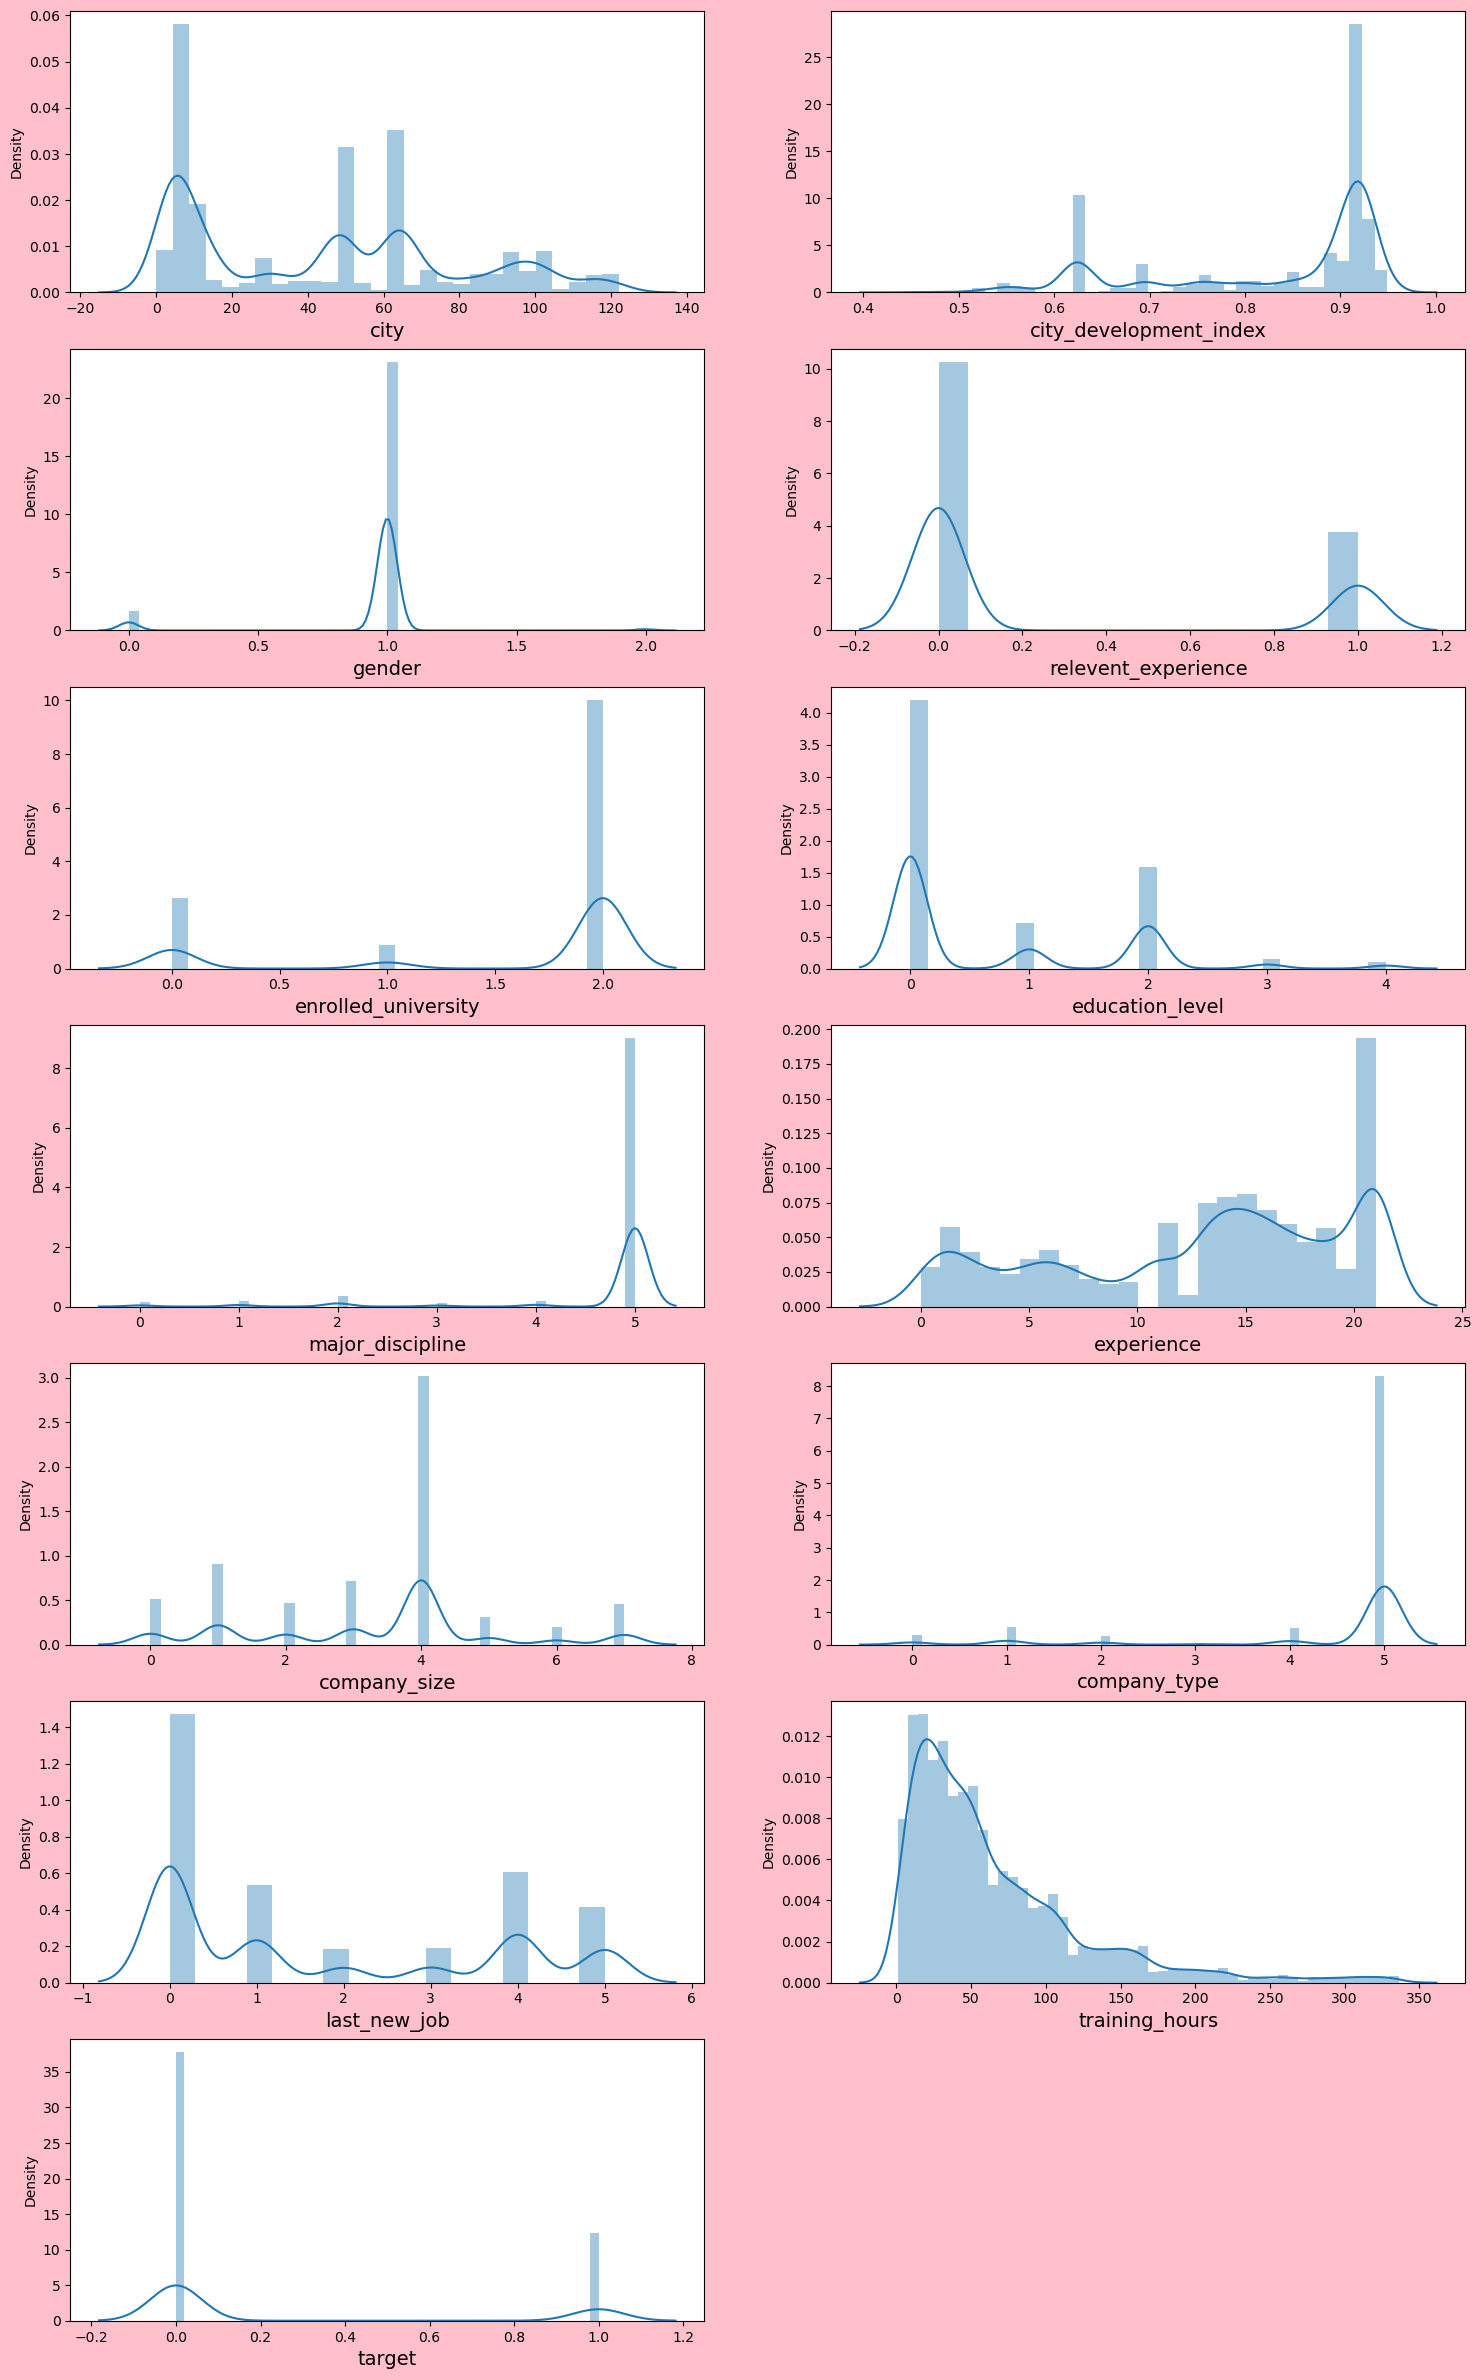

In [185]:
plt.figure(figsize=(18,30),facecolor='pink')
plotn=1
for i in numcol:
    if plotn<=13:
        ax=plt.subplot(7,2,plotn)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=14)
        plotn=plotn+1

In [186]:
# find the skewness present in each column

newdf.skew()

city                      0.392934
city_development_index   -1.009967
gender                    0.000000
relevent_experience       1.053978
enrolled_university      -1.269671
education_level           1.141437
major_discipline         -4.240788
experience               -0.506145
company_size             -0.133202
company_type             -2.884169
last_new_job              0.506748
training_hours            1.265576
target                    1.183469
dtype: float64

<AxesSubplot:>

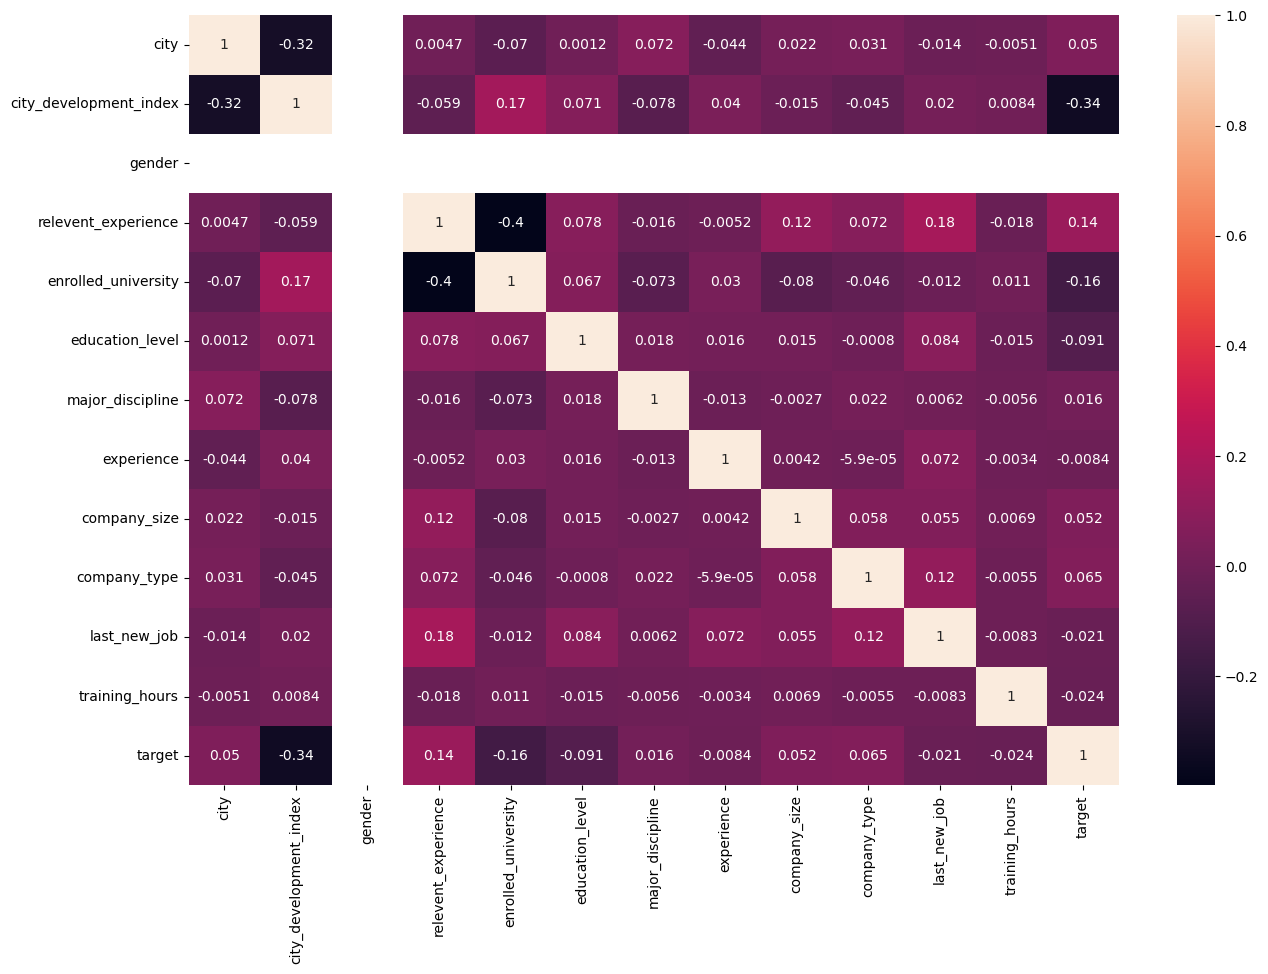

In [187]:
# by plotting heatmap find the corelation of target and features

plt.figure(figsize=(15,10))
sns.heatmap(newdf.corr(),annot=True)

In [188]:
newdf.skew()

city                      0.392934
city_development_index   -1.009967
gender                    0.000000
relevent_experience       1.053978
enrolled_university      -1.269671
education_level           1.141437
major_discipline         -4.240788
experience               -0.506145
company_size             -0.133202
company_type             -2.884169
last_new_job              0.506748
training_hours            1.265576
target                    1.183469
dtype: float64

In [189]:
# using PowerTransformer remove the skewness from the columns 

ske=['city_development_index','relevent_experience','enrolled_university','education_level','major_discipline','company_type','training_hours']
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
newdf[ske]=pt.fit_transform(newdf[ske].values)

In [190]:
newdf.skew()

city                      0.392934
city_development_index   -0.578227
gender                    0.000000
relevent_experience       1.053978
enrolled_university      -1.119472
education_level           0.526783
major_discipline         -3.533052
experience               -0.506145
company_size             -0.133202
company_type             -2.140145
last_new_job              0.506748
training_hours           -0.038330
target                    1.183469
dtype: float64

<AxesSubplot:>

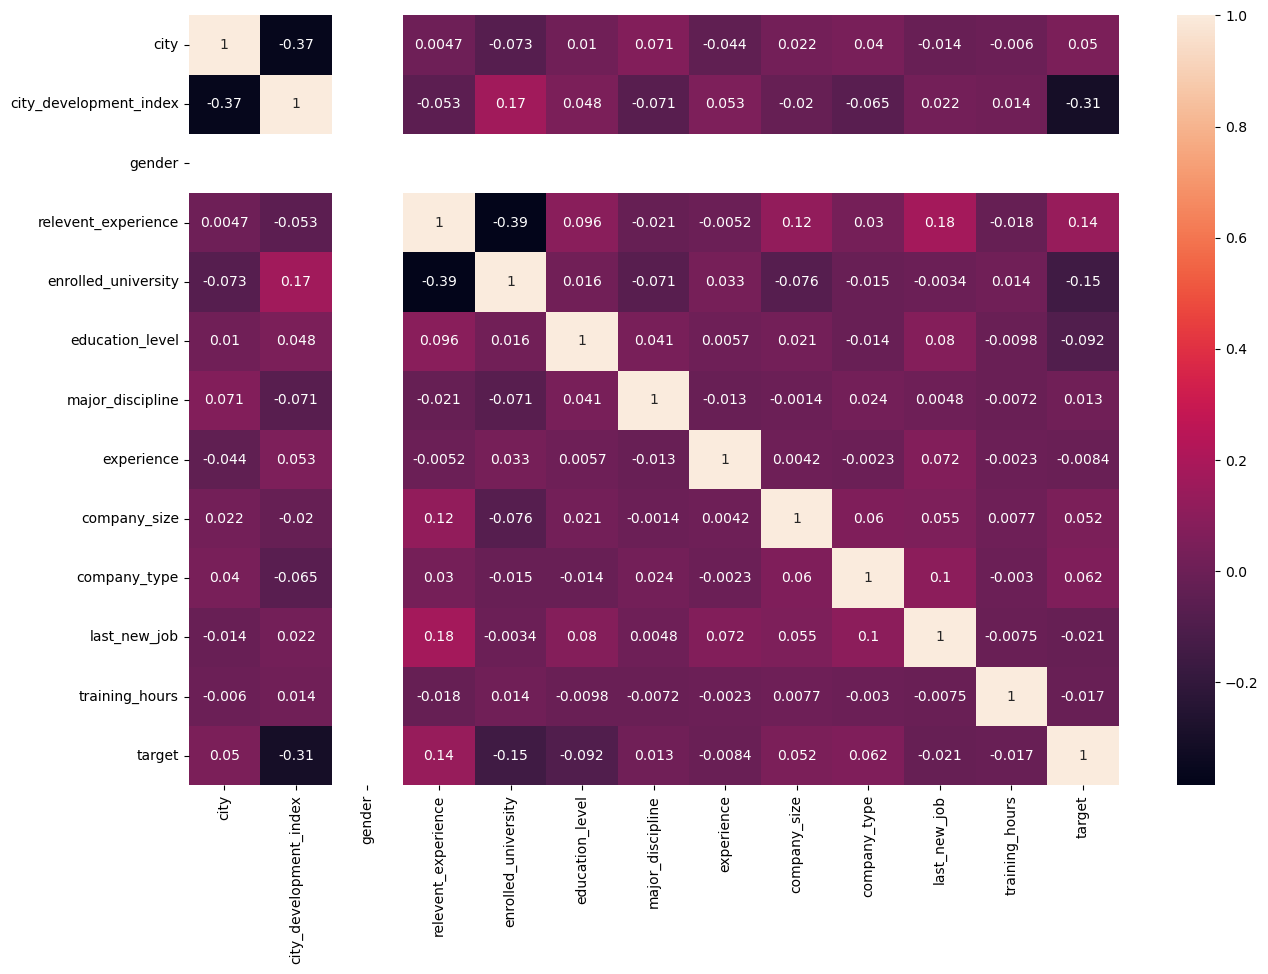

In [191]:
plt.figure(figsize=(15,10))
sns.heatmap(newdf.corr(),annot=True)

In [192]:
# split our features and target in x and y respectively 

x = newdf.iloc[:,:-1]
x

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,5.0,0.824465,1.0,-0.603400,0.593154,-0.783349,0.263427,21.0,4.0,0.397438,0.0,-0.248663
1,77.0,-0.896247,1.0,1.657274,0.593154,-0.783349,0.263427,6.0,4.0,0.397438,4.0,0.042665
2,64.0,-1.539893,1.0,1.657274,-1.790745,-0.783349,0.263427,15.0,4.0,0.397438,5.0,0.725322
4,50.0,-0.957226,1.0,-0.603400,0.593154,1.355215,0.263427,21.0,4.0,-2.682973,3.0,-1.581882
5,57.0,-0.976701,1.0,-0.603400,-1.257944,-0.783349,0.263427,2.0,4.0,0.397438,0.0,-0.658636
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,55.0,0.141141,1.0,1.657274,0.593154,-0.783349,-3.799967,5.0,4.0,0.397438,0.0,-0.082391
19154,5.0,0.824465,1.0,-0.603400,0.593154,-0.783349,0.263427,5.0,4.0,0.397438,3.0,0.157804
19155,5.0,0.824465,1.0,-0.603400,0.593154,-0.783349,0.263427,21.0,4.0,0.397438,3.0,-0.031054
19156,94.0,-0.696705,1.0,-0.603400,0.593154,0.936905,0.263427,20.0,5.0,0.397438,1.0,0.927810


In [193]:
y = newdf.iloc[:,-1]
y

0        1.0
1        0.0
2        0.0
4        0.0
5        1.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 15241, dtype: float64

In [194]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xscaled=sc.fit_transform(x)
xscaled

array([[-1.1093143 ,  0.8244648 ,  0.        , ...,  0.3974375 ,
        -0.93128936, -0.24866313],
       [ 0.92006722, -0.89624695,  0.        , ...,  0.3974375 ,
         1.14011509,  0.0426654 ],
       [ 0.55365111, -1.53989266,  0.        , ...,  0.3974375 ,
         1.6579662 ,  0.72532224],
       ...,
       [-1.1093143 ,  0.8244648 ,  0.        , ...,  0.3974375 ,
         0.62226398, -0.03105416],
       [ 1.39922674, -0.69670461,  0.        , ...,  0.3974375 ,
        -0.41343825,  0.92780978],
       [ 1.4274126 , -0.15948638,  0.        , ...,  0.3974375 ,
        -0.93128936,  1.29442076]])

In [195]:
# split the data for training and testing

In [196]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xscaled,y,test_size=0.30,random_state=1)

In [197]:
from sklearn.metrics import classification_report,accuracy_score

In [198]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)

    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)

    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}")
    print(classification_report(ytest,ypred))
    return model


# Apply LogisticRegression() and find out accuracy


from sklearn.linear_model import LogisticRegression

In [199]:
lr=mymodel(LogisticRegression())

Training Accuracy : 0.7695913010873641
Testing Accuracy : 0.76186310955609
              precision    recall  f1-score   support

         0.0       0.78      0.95      0.86      3428
         1.0       0.57      0.20      0.30      1145

    accuracy                           0.76      4573
   macro avg       0.68      0.57      0.58      4573
weighted avg       0.73      0.76      0.72      4573



In [200]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

In [201]:
from sklearn.model_selection import cross_val_score
ac=ac
print(ac)
cv_score=(cross_val_score(lr,x,y,cv=5).mean())
print("\n Cross validation Score:",cv_score)

#Difference of R2 score minus CV score

difference=ac-cv_score
print("\n R2 Score - Cross Validation score is",difference)

0.76186310955609

 Cross validation Score: 0.7647792959956752

 R2 Score - Cross Validation score is -0.0029161864395851333


# Apply KNeighborsClassifier and find out accuracy

In [202]:
from sklearn.neighbors import KNeighborsClassifier

In [203]:
knn=mymodel(KNeighborsClassifier(n_neighbors=5))

Training Accuracy : 0.8189913760779902
Testing Accuracy : 0.7430570741307676
              precision    recall  f1-score   support

         0.0       0.80      0.87      0.84      3428
         1.0       0.48      0.35      0.41      1145

    accuracy                           0.74      4573
   macro avg       0.64      0.61      0.62      4573
weighted avg       0.72      0.74      0.73      4573



In [204]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

In [205]:
ac=ac
print(ac)
cv_score=(cross_val_score(knn,x,y,cv=5).mean())
print("\n Cross validation Score:",cv_score)

#Difference of R2 score minus CV score

difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

0.7430570741307676

 Cross validation Score: 0.7489004828397762

 R2 Score - Cross Validation score is -0.0058434087090085685


# Apply DecisionTreeClassifier and find out accuracy

In [206]:
from sklearn.tree import DecisionTreeClassifier

In [207]:
dtc = mymodel(DecisionTreeClassifier())

Training Accuracy : 0.9970003749531309
Testing Accuracy : 0.7074130767548655
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80      3428
         1.0       0.42      0.44      0.43      1145

    accuracy                           0.71      4573
   macro avg       0.61      0.62      0.62      4573
weighted avg       0.71      0.71      0.71      4573



In [208]:
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
ypred=dtc.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

In [209]:
ac=ac
print(ac)
cv_score=(cross_val_score(dtc,x,y,cv=5).mean())
print("\n Cross validation Score:",cv_score)

#Difference of R2 score minus CV score

difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

0.7041329542969604

 Cross validation Score: 0.7044156726227523

 R2 Score - Cross Validation score is -0.0002827183257918531


# Apply SVM algorithm and find out Accuracy

In [210]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Hard margin
linsvc=mymodel(LinearSVC(random_state=1))

Training Accuracy : 0.7679977502812149
Testing Accuracy : 0.7616444347255631
              precision    recall  f1-score   support

         0.0       0.77      0.96      0.86      3428
         1.0       0.59      0.15      0.24      1145

    accuracy                           0.76      4573
   macro avg       0.68      0.56      0.55      4573
weighted avg       0.73      0.76      0.70      4573



In [211]:
linsvc=LinearSVC()
linsvc.fit(xtrain,ytrain)
ypred=dtc.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

In [212]:
ac=ac
print(ac)
cv_score=(cross_val_score(linsvc,x,y,cv=5).mean())
print("\n Cross validation Score:",cv_score)

#Difference of R2 score minus CV score

difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

0.7041329542969604

 Cross validation Score: 0.6258202852964141

 R2 Score - Cross Validation score is 0.07831266900054634


In [213]:
# soft margin

linSVC=mymodel(LinearSVC(random_state=1,C=0.8))

Training Accuracy : 0.7679977502812149
Testing Accuracy : 0.7616444347255631
              precision    recall  f1-score   support

         0.0       0.77      0.96      0.86      3428
         1.0       0.59      0.15      0.24      1145

    accuracy                           0.76      4573
   macro avg       0.68      0.56      0.55      4573
weighted avg       0.73      0.76      0.70      4573



In [214]:
linSVC=LinearSVC(random_state=1,C=0.8)
linSVC.fit(xtrain,ytrain)
ypred=dtc.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

In [215]:
ac=ac
print(ac)
cv_score=(cross_val_score(linSVC,x,y,cv=5).mean())
print("\n Cross validation Score:",cv_score)

#Difference of R2 score minus CV score

difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

0.7041329542969604

 Cross validation Score: 0.6460790035715853

 R2 Score - Cross Validation score is 0.058053950725375114


## Apply all Naive Bayes  algorithm to find Accuracy

MultinomialNB,BernoulliNB,GaussianNB

In [216]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB

In [217]:
bnb=mymodel(BernoulliNB())

Training Accuracy : 0.7559055118110236
Testing Accuracy : 0.7502733435381588
              precision    recall  f1-score   support

         0.0       0.78      0.92      0.85      3428
         1.0       0.50      0.23      0.31      1145

    accuracy                           0.75      4573
   macro avg       0.64      0.58      0.58      4573
weighted avg       0.71      0.75      0.71      4573



In [218]:
bnb.fit(xtrain,ytrain)
ypred=bnb.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

In [219]:
ac=ac
print(ac)
cv_score=(cross_val_score(bnb,x,y,cv=5).mean())
print("\n Cross validation Score:",cv_score)

#Difference of R2 score minus CV score

difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

0.7502733435381588

 Cross validation Score: 0.7498197851539465

 R2 Score - Cross Validation score is 0.00045355838421223815


In [220]:
gnb=mymodel(GaussianNB())

Training Accuracy : 0.7488751406074241
Testing Accuracy : 0.7502733435381588
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      3428
         1.0       0.50      0.43      0.46      1145

    accuracy                           0.75      4573
   macro avg       0.66      0.64      0.65      4573
weighted avg       0.74      0.75      0.74      4573



In [221]:
gnb.fit(xtrain,ytrain)
ypred=gnb.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

In [222]:
ac=ac
print(ac)
cv_score=(cross_val_score(gnb,x,y,cv=5).mean())
print("\n Cross validation Score:",cv_score)

#Difference of R2 score minus CV score

difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

0.7502733435381588

 Cross validation Score: 0.7466701573339738

 R2 Score - Cross Validation score is 0.0036031862041849827


## Apply all Boosting algorithms to find Accuracy

GradientBoostingClassifier , XGBClassifier ,AdaBoostClassifier

In [223]:
from sklearn.ensemble import GradientBoostingClassifier

gbr=mymodel(GradientBoostingClassifier(n_estimators=2))

Training Accuracy : 0.7567491563554556
Testing Accuracy : 0.7496173190465777
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      3428
         1.0       0.00      0.00      0.00      1145

    accuracy                           0.75      4573
   macro avg       0.37      0.50      0.43      4573
weighted avg       0.56      0.75      0.64      4573



In [224]:
gbr.fit(xtrain,ytrain)
ypred=gbr.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

In [225]:
ac=ac
print(ac)
cv_score=(cross_val_score(gbr,x,y,cv=5).mean())
print("\n Cross validation Score:",cv_score)

#Difference of R2 score minus CV score

difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

0.7496173190465777

 Cross validation Score: 0.7546092733816603

 R2 Score - Cross Validation score is -0.0049919543350825935


In [226]:
from xgboost import XGBClassifier

xgb=mymodel(XGBClassifier(random_state=1,reg_alpha=1))

Training Accuracy : 0.8872328458942632
Testing Accuracy : 0.7692980537940083
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      3428
         1.0       0.55      0.40      0.46      1145

    accuracy                           0.77      4573
   macro avg       0.69      0.65      0.66      4573
weighted avg       0.75      0.77      0.76      4573



In [227]:
xgb.fit(xtrain,ytrain)
ypred=xgb.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

In [228]:
ac=ac

print(ac)
cv_score=(cross_val_score(xgb,x,y,cv=5).mean())
print("\n Cross validation Score:",cv_score)

#Difference of R2 score minus CV score

difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

0.7692980537940083

 Cross validation Score: 0.7747519301969839

 R2 Score - Cross Validation score is -0.005453876402975566


In [229]:
from sklearn.ensemble import AdaBoostClassifier

adb=mymodel(AdaBoostClassifier(random_state=1))

Training Accuracy : 0.7818710161229846
Testing Accuracy : 0.7817625191340477
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.86      3428
         1.0       0.62      0.33      0.43      1145

    accuracy                           0.78      4573
   macro avg       0.71      0.63      0.65      4573
weighted avg       0.76      0.78      0.76      4573



In [230]:
adb.fit(xtrain,ytrain)
ypred=adb.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)

In [231]:
ac=ac
print(ac)
cv_score=(cross_val_score(adb,x,y,cv=5).mean())
print("\n Cross validation Score:",cv_score)

#Difference of R2 score minus CV score

difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

0.7817625191340477

 Cross validation Score: 0.7795420210059836

 R2 Score - Cross Validation score is 0.00222049812806413


In [232]:
d={'Accuracy':[0.7618,0.7430,0.7067,0.7067,0.7067,0.7502,0.7502,0.7496,0.7692,0.7817],'CV Score':[0.7647,0.7489,0.7058,0.6961,0.6460,0.7498,0.7466,0.7546,0.7747,0.7795]}

In [233]:
D=pd.DataFrame(d)
D

,Accuracy,CV Score
0,0.7618,0.7647
1,0.7430,0.7489
2,0.7067,0.7058
3,0.7067,0.6961
4,0.7067,0.6460
5,0.7502,0.7498
6,0.7502,0.7466
7,0.7496,0.7546
8,0.7692,0.7747
9,0.7817,0.7795


In [234]:
D['Difference']=(D['Accuracy']-D['CV Score'])

In [235]:
D

,Accuracy,CV Score,Difference
0,0.7618,0.7647,-0.0029
1,0.7430,0.7489,-0.0059
2,0.7067,0.7058,0.0009
3,0.7067,0.6961,0.0106
4,0.7067,0.6460,0.0607
5,0.7502,0.7498,0.0004
6,0.7502,0.7466,0.0036
7,0.7496,0.7546,-0.0050
8,0.7692,0.7747,-0.0055
9,0.7817,0.7795,0.0022


Here we got less difference in KNeighborsClassifier i.e.-0.0059

So Moving towards hyperparameter Tunning of KNeighborsClassifier

In [236]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [237]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [238]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [239]:
gs.fit(xtrain,ytrain)
print(gs.best_estimator_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
KNeighborsClassifier(metric='manhattan', n_neighbors=15)


In [240]:
gs.best_score_

0.7639670041244845

In [241]:
ypred=gs.predict(xtest)
print(ypred)

[0. 0. 0. ... 1. 0. 0.]


In [242]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, ypred), ": is the accuracy score")

0.759457686420293 : is the accuracy score


In [243]:
from sklearn.model_selection import cross_val_score
ac=accuracy_score(ytest,ypred)
print(ac)
cv_score=(cross_val_score(gs,x,y,cv=3).mean())
print("\n Cross validation Score:",cv_score)

#Difference of R2 score minus CV score

difference=ac-cv_score
print("\n R2 Score - Cross Validation score is", difference)

0.759457686420293
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits

 Cross validation Score: 0.7655669492799327

 R2 Score - Cross Validation score is -0.0061092628596397525


In [244]:
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.7635323831487283
